Adam Wardak - aww6747

Data Science Bootcamp

Instructor Rohan Chopra

Week 8 Assignment

Logistic Regression:

1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

glass = pd.read_csv('glass.csv')
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.sort_values(by='Al', inplace=True)

X = np.array(glass.Al).reshape(-1, 1)
y = glass.household

logreg = LogisticRegression()
logreg.fit(X, y)

probs = logreg.predict_proba(X)[:, 1]

thresholds = [0.3, 0.5, 0.7]
for thresh in thresholds:
    preds = (probs >= thresh).astype(int)
    acc = accuracy_score(y, preds)
    prec = precision_score(y, preds)
    rec = recall_score(y, preds)
    print(f"Threshold: {thresh}")
    print(f"  Accuracy:  {acc:.3f}")
    print(f"  Precision: {prec:.3f}")
    print(f"  Recall:    {rec:.3f}\n")

Threshold: 0.3
  Accuracy:  0.864
  Precision: 0.720
  Recall:    0.706

Threshold: 0.5
  Accuracy:  0.869
  Precision: 0.897
  Recall:    0.510

Threshold: 0.7
  Accuracy:  0.836
  Precision: 1.000
  Recall:    0.314



2. Do the same analysis for other columns

In [8]:
feature = 'Ba'

glass.sort_values(by=feature, inplace=True)

X = np.array(glass[feature]).reshape(-1, 1)
y = glass['household']

logreg.fit(X, y)

probs = logreg.predict_proba(X)[:, 1]

thresholds = [0.3, 0.5, 0.7]
for thresh in thresholds:
    preds = (probs >= thresh).astype(int)
    acc = accuracy_score(y, preds)
    prec = precision_score(y, preds)
    rec = recall_score(y, preds)
    print(f"Threshold: {thresh}")
    print(f"  Accuracy:  {acc:.3f}")
    print(f"  Precision: {prec:.3f}")
    print(f"  Recall:    {rec:.3f}\n")


Threshold: 0.3
  Accuracy:  0.879
  Precision: 0.931
  Recall:    0.529

Threshold: 0.5
  Accuracy:  0.836
  Precision: 0.900
  Recall:    0.353

Threshold: 0.7
  Accuracy:  0.827
  Precision: 0.938
  Recall:    0.294



3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

In [10]:
from sklearn.preprocessing import StandardScaler

X = glass.drop(columns=['Type', 'household'])
y = glass['household']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg.fit(X_scaled, y)

probs = logreg.predict_proba(X_scaled)[:, 1]

thresholds = [0.3, 0.5, 0.7]
for thresh in thresholds:
    preds = (probs >= thresh).astype(int)
    acc = accuracy_score(y, preds)
    prec = precision_score(y, preds)
    rec = recall_score(y, preds)
    print(f"Threshold: {thresh}")
    print(f"  Accuracy:  {acc:.3f}")
    print(f"  Precision: {prec:.3f}")
    print(f"  Recall:    {rec:.3f}\n")


Threshold: 0.3
  Accuracy:  0.949
  Precision: 0.885
  Recall:    0.902

Threshold: 0.5
  Accuracy:  0.944
  Precision: 0.898
  Recall:    0.863

Threshold: 0.7
  Accuracy:  0.930
  Precision: 0.974
  Recall:    0.725



4. Plot ROC Curves for each model

/var/folders/07/tzj2_3qs0vz6f201sm62ly7m0000gn/T/ipykernel_26750/76830736.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


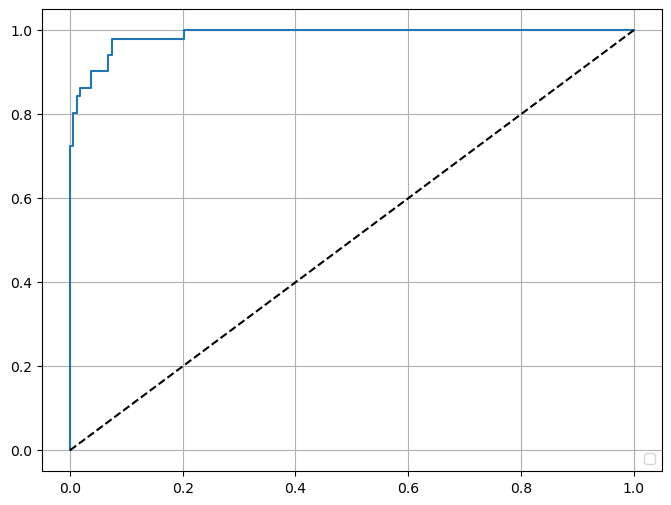

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, roc_thresholds = roc_curve(y, probs)
auc = roc_auc_score(y, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()